In [25]:
import pandas as pd
import sqlite3
import statistics
import matplotlib.pyplot as plt

In [26]:
MS1_CE = 10
CONVERTED_DATABASE = '/Users/darylwilding-mcbride/Downloads/HeLa_20KInt-rt-3000-3600-denoised/HeLa_20KInt.sqlite'
RT_LOWER = 3000
RT_UPPER = 3600

In [27]:
db_conn = sqlite3.connect(CONVERTED_DATABASE)
ms1_frame_properties_df = pd.read_sql_query("select frame_id,retention_time_secs from frame_properties where retention_time_secs >= {} and retention_time_secs <= {} and collision_energy == {}".format(RT_LOWER, RT_UPPER, MS1_CE), db_conn)
ms1_frame_ids = tuple(ms1_frame_properties_df.frame_id)
points_df = pd.read_sql_query("select frame_id,scan,intensity from frames where frame_id in {}".format(ms1_frame_ids), db_conn)
db_conn.close()

In [29]:
values = []
for group_name,group_df in points_df.groupby('frame_id'):
    median_mobility = statistics.median(group_df.scan)
    intensity = group_df.intensity.sum()
    values.append((group_name, median_mobility, intensity))

In [28]:
values_df = pd.DataFrame(values, columns=['frame_id','median_mobility','intensity'])

AssertionError: 3 columns passed, passed data had 2 columns

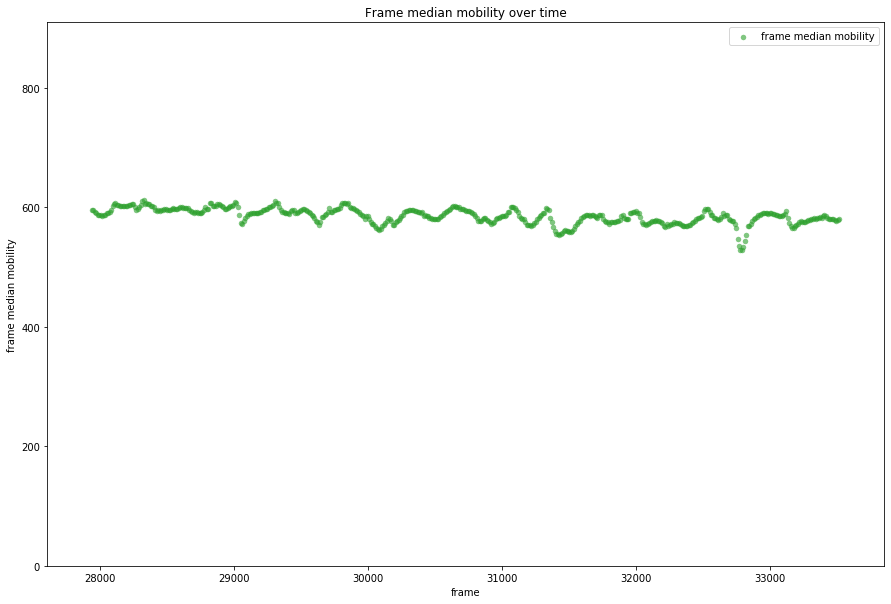

In [20]:
f, ax = plt.subplots()
f.set_figheight(10)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('Frame median mobility over time')

ax.scatter(values_df.frame_id, values_df.median_mobility, marker='o', color='tab:green', lw=0, s=30, alpha=0.6, label="frame median mobility")

plt.legend(loc='best')
plt.xlabel('frame')
plt.ylabel('frame median mobility')

# plt.xlim([-5,150])
plt.ylim([0,910])

plt.show()

In [21]:
import pandas as pd

In [22]:
df = pd.read_pickle('/Users/darylwilding-mcbride/Downloads/values.pkl')

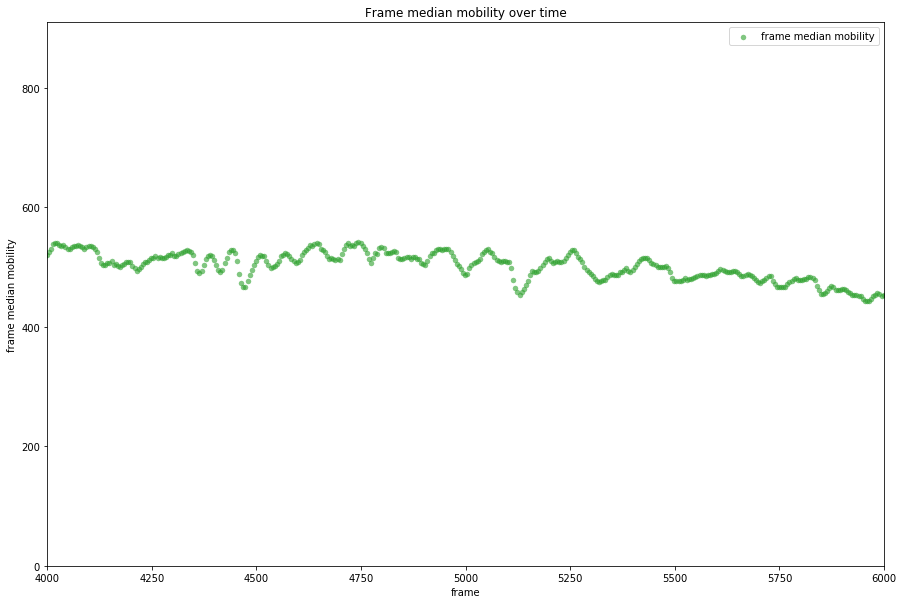

In [24]:
f, ax = plt.subplots()
f.set_figheight(10)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('Frame median mobility over time')

ax.scatter(df.frame_id, df.median_mobility, marker='o', color='tab:green', lw=0, s=30, alpha=0.6, label="frame median mobility")

plt.legend(loc='best')
plt.xlabel('frame')
plt.ylabel('frame median mobility')

plt.xlim([4000,6000])
plt.ylim([0,910])

plt.show()